## ${\textbf{Libraries}}$

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## ${\textbf{Exploratory Data Analysis}}$

In [2]:
# Read the data from CSV file
df = pd.read_csv('customer_segmentation_data.csv', sep = ',', index_col = False)

In [3]:
#descriptive statistics of the data
df.describe()

,<<<<<<< HEAD
count,7454
unique,1946
top,0
freq,78


In [4]:
# Make a copy of the original data frame as a good coding practice
df_segmentation = df.copy()

In [5]:
# Check for missing values
df_segmentation.isnull().sum()

<<<<<<< HEAD    218
dtype: int64

In [6]:
# Fill missing values with zeroes.
df_segmentation = df_segmentation.fillna(0)

In [7]:
df_segmentation.head()

,<<<<<<< HEAD
0,minutes_watched
1,3197
2,63
3,605
4,20


In [8]:
df_segmentation.dtypes

<<<<<<< HEAD    object
dtype: object

### ${\textbf{Correlation Estimate}}$

In [9]:
df_segmentation.corr()

ValueError: could not convert string to float: 'minutes_watched'

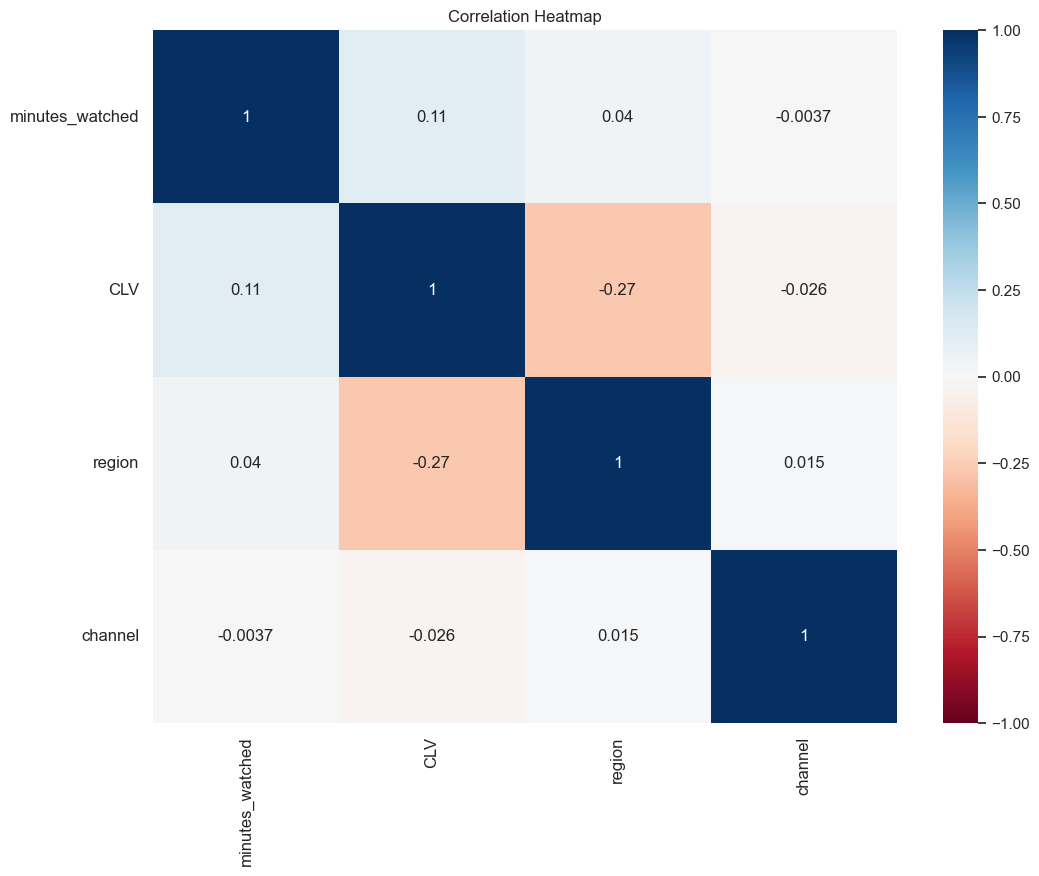

In [ ]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.savefig('corr.png')
plt.show()

The heatmap shows correlations between variables like minutes watched, CLV, region, and channel. Key insights include:

* **minutes_watched and CLV:** Weak positive correlation, suggesting customers who watch more videos have slightly higher lifetime value.
* **CLV and region:** Moderate negative correlation, indicating region might influence CLV.
* **minutes_watched and channel:** Moderate negative correlation, suggesting channel might affect viewing behavior.



### ${\textbf{Visualize Raw Data}}$

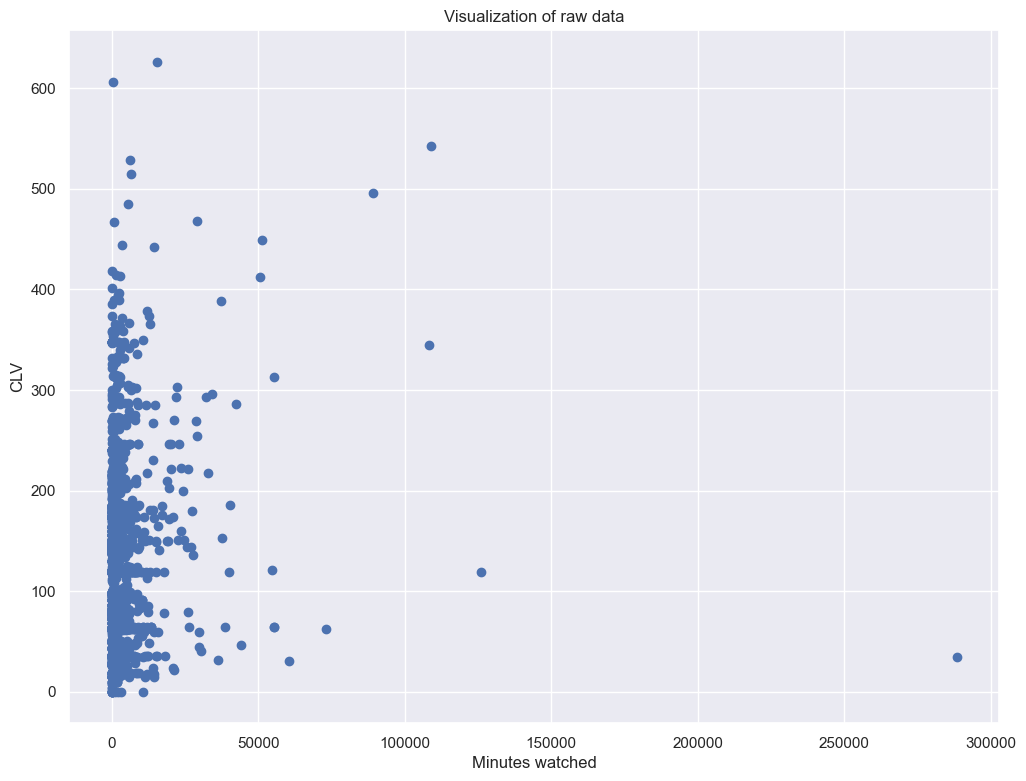

In [ ]:
# Setting the size of the plot
plt.figure(figsize = (12, 9))

# Plotting a scatter plot using the first and second columns of the dataframe `df_segmentation`
plt.scatter(df_segmentation.iloc[:, 0], df_segmentation.iloc[:, 1])

# Labeling the x-axis as 'Minutes watched'
plt.xlabel('Minutes watched')

# Labeling the y-axis as 'CLV' (Customer Lifetime Value)
plt.ylabel('CLV')

# Providing a title for the plot
plt.title('Visualization of raw data')

# Saving the plot as a PNG image named 'scatter.png'
plt.savefig("scatter.png")

# Displaying the plot
plt.show()

### ${\textbf{Create Dummy Variables}}$

In [ ]:
# create a list of the channels of acquisition variable
df_heard_from = df_segmentation['channel'] 

In [ ]:
# create a list of the channels of the country variable
df_countries = df_segmentation['region'] 

In [ ]:
# Get dummy variables for each unique value in 'channel'
df_dummies = pd.get_dummies(df['channel'].apply(pd.Series).stack())

# Use groupby on index and then sum the results
df_dummies = df_dummies.groupby(level=0).sum()

# Join the dummy variables to original dataframe
df = df.join(df_dummies)

In [ ]:
# identical dummies for the channel of aquisition
segment_dummies = pd.get_dummies(df_heard_from, prefix = 'channel', prefix_sep = '_')
df_segmentation = pd.concat([df_segmentation, segment_dummies], axis = 1)

#df_pa = df_purchase_predictors

In [ ]:
# Creating dummy variables for the `df_countries` dataframe. 
# Each column in `df_countries` will be prefixed with 'country_region_' in the new columns.
segment_dummies_2 = pd.get_dummies(df_countries, prefix = 'country_region', prefix_sep = '_')

# Appending the created dummy columns from `segment_dummies_2` to the `df_segmentation` dataframe.
df_segmentation = pd.concat([df_segmentation, segment_dummies_2], axis = 1)

In [ ]:
# drop the channel variable as it is non-numerical and we'll not be able to perform the segmentation
df_segmentation = df_segmentation.drop(["channel"], axis = 1)

In [ ]:
df_segmentation

,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,False,False,True,False,False,False,False,False,True,False,False
3830,28.0,79.00,0,False,True,False,False,False,False,False,False,True,False,False
3831,57.0,36.00,2,False,True,False,False,False,False,False,False,False,False,True
3832,44.0,36.00,2,True,False,False,False,False,False,False,False,False,False,True


In [ ]:
# rename the columns after adding the dummie variables
df_segmentation = df_segmentation.rename(columns = {'channel_1':'Google', 'channel_2':'Facebook', 'channel_3':'YouTube','channel_4':'LinkedIn', 
                                                    'channel_5':'Twitter', 'channel_6':'Instagram', 'channel_7':'Friend', 'channel_8':'Other',
                                                    'country_region_0':'Region_0','country_region_1':'Region_1','country_region_2':'Region_2'})

In [ ]:
df_segmentation

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,Region_0,Region_1,Region_2
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,False,False,True,False,False,False,False,False,True,False,False
3830,28.0,79.00,0,False,True,False,False,False,False,False,False,True,False,False
3831,57.0,36.00,2,False,True,False,False,False,False,False,False,False,False,True
3832,44.0,36.00,2,True,False,False,False,False,False,False,False,False,False,True


## ${\textbf{Model Implementation}}$

### ${\textbf{Standardization}}$

In [ ]:
# Initializing a StandardScaler object to standardize the features.
scaler = StandardScaler()

# Standardizing the data in the 'df_segmentation' dataframe.
# This means transforming the data so that it has a mean of 0 and a standard deviation of 1 for each feature.
segmentation_std = scaler.fit_transform(df_segmentation)

In [ ]:
# Performing hierarchical clustering on the standardized data using the 'ward' method.
# The 'ward' method minimizes the sum of squared differences within all clusters.
hier_clust = linkage(segmentation_std, method = 'ward')

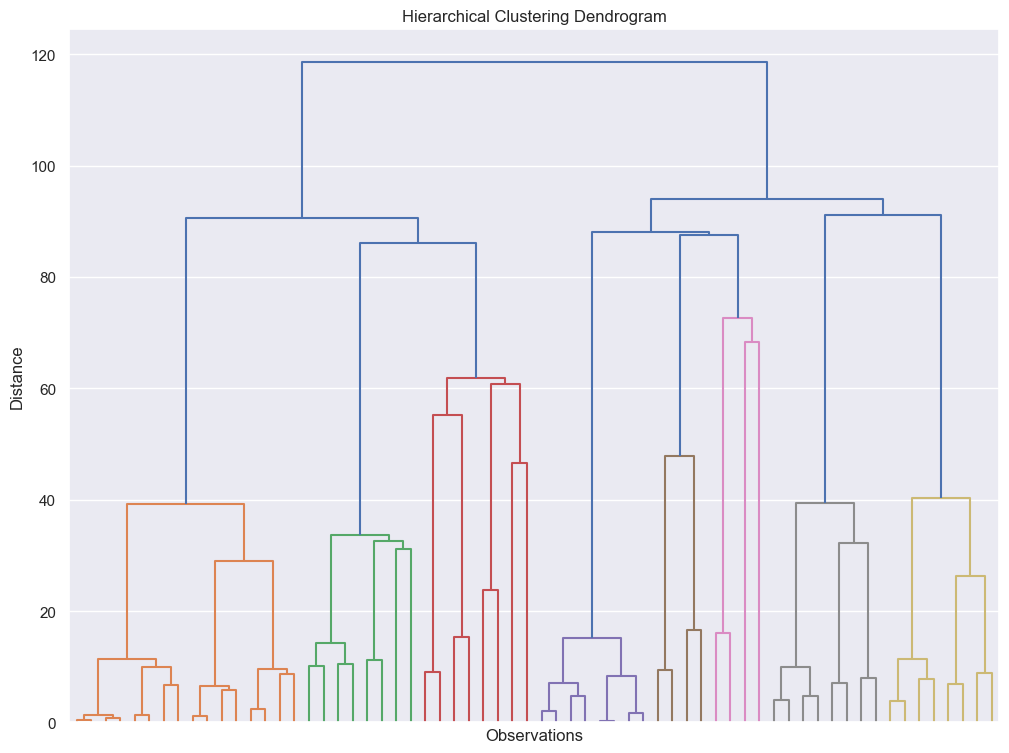

In [ ]:
# Setting the figure size for the plot.
plt.figure(figsize = (12,9))

# Setting the title of the dendrogram.
plt.title('Hierarchical Clustering Dendrogram')

# Labeling the x-axis as 'Observations'.
plt.xlabel('Observations')

# Labeling the y-axis as 'Distance'.
plt.ylabel('Distance')

# Creating the dendrogram for the hierarchical clustering result.
# We're truncating the dendrogram to show only the last 5 merged clusters.
# Leaf counts and labels are not displayed.
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)

# Saving the dendrogram plot as a PNG image named 'hierarchical.png'.
plt.savefig('hierarchical.png')

# Displaying the dendrogram.
plt.show()

### ${\textbf{K-means Clustering}}$

In [ ]:
# Initializing an empty list to store the Within-Cluster-Sum-of-Squares (WCSS) for different cluster numbers.
wcss = []

# Looping through numbers 1 to 10 to evaluate the optimal number of clusters for k-means clustering.
for i in range(1,11):
    # Initializing the KMeans algorithm with the current number of clusters (i).
    # Using the 'k-means++' method to initialize the centroids which tends to speed up convergence.
    # Setting a random state for reproducibility.
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    
    # Fitting the standardized data to the KMeans algorithm.
    kmeans.fit(segmentation_std)
    
    # Appending the WCSS value (inertia_) of the current clustering to the wcss list.
    wcss.append(kmeans.inertia_)

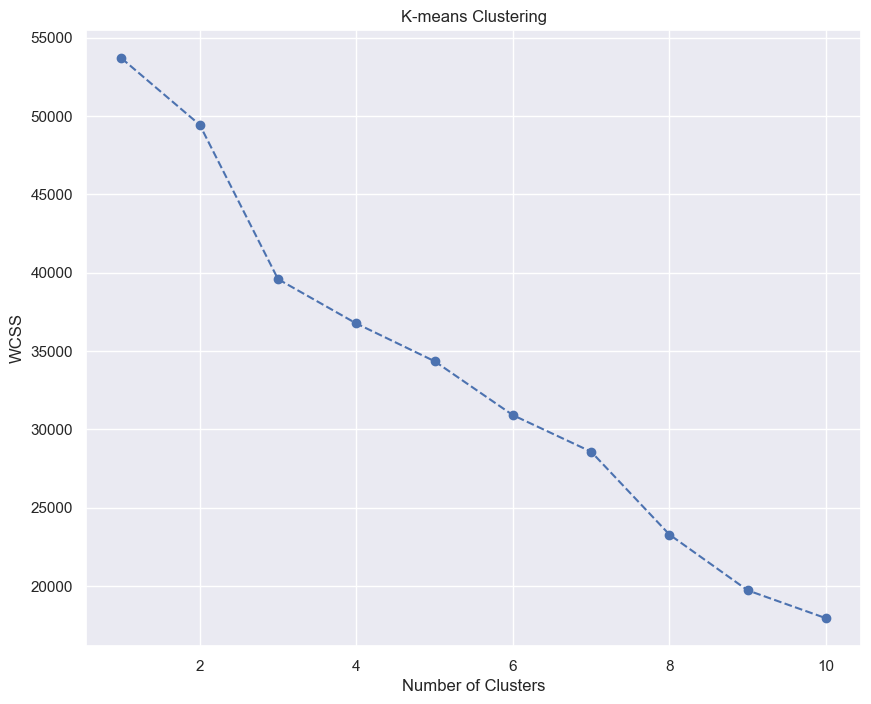

In [ ]:


# Setting the figure size for the plot.
plt.figure(figsize = (10,8))

# Plotting the WCSS values against the number of clusters. 
# This is commonly called the Elbow Method, as the elbow point (bend in the line) represents an optimal number of clusters.
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')

# Saving the Elbow Method plot as a PNG image named 'line_chart.png'.
plt.savefig('line_chart.png')

# Displaying the plot.
plt.show()

In [ ]:
# the KMeans algorithm is initialized here with 8 clusters.
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)

In [ ]:
# Fitting the standardized data to the KMeans algorithm with 8 clusters.
kmeans.fit(segmentation_std)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


## ${\textbf{Model Interpretation and Results}}$

In [ ]:
# Creating a copy of the original 'df_segmentation' dataframe to avoid modifying it directly.
df_segm_kmeans = df_segmentation.copy()

# Assigning the cluster labels generated by k-means to a new column named 'Segment' in the copied dataframe.
df_segm_kmeans['Segment'] = kmeans.labels_

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment']).mean()
df_segm_analysis


# Grouping the dataframe by the 'Segment' column and calculating the mean for each segment.
# This provides a profile for each cluster based on the mean values of the original features.
df_segm_analysis = df_segm_kmeans.groupby(['Segment']).mean()

# Displaying the segmented analysis (this line is more relevant in an interactive environment like Jupyter Notebook).
df_segm_analysis

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,Region_0,Region_1,Region_2
Segment,,,,,,,,,,,,,,
0,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.287582,0.101307,0.611111
1,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.0,0.140284,1.000000,0.000000,0.000000
2,1763.190889,100.376616,1.848156,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.151844,0.848156
3,1800.537897,111.313594,1.801956,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.198044,0.801956
4,2486.479434,118.394974,1.785347,0.000000,0.0,0.820051,0.000000,0.0,0.0,0.0,0.179949,0.000000,0.214653,0.785347
5,2006.190377,113.654038,1.372385,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.257322,0.112971,0.629707
6,985.327586,93.151552,1.603448,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.172414,0.051724,0.775862
7,1299.332180,115.180277,1.186851,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.311419,0.190311,0.498270


In [ ]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment','Region_0']].groupby(['Segment']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()


# Counting the number of observations in each segment.
# This is done by grouping by 'Segment' and counting the occurrences.
# 'Region_0' is used arbitrarily to count, as it exists in each segment.
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment','Region_0']].groupby(['Segment']).count()

# Calculating the proportion of observations in each segment.
# This is done by dividing the number of observations in a segment by the total number of observations.
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [ ]:
# Rounding the dataframe values to 2 decimal places for cleaner presentation.
df_segm_analysis.round(2)

,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,Region_0,Region_1,Region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
0,2767.64,108.26,1.32,0.00,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.29,0.10,0.61,306,0.08
1,1539.15,136.33,0.00,0.25,0.0,0.43,0.18,0.0,0.0,0.0,0.14,1.00,0.00,0.00,1055,0.28
2,1763.19,100.38,1.85,0.00,0.0,0.00,1.00,0.0,0.0,0.0,0.00,0.00,0.15,0.85,461,0.12
3,1800.54,111.31,1.80,1.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.20,0.80,409,0.11
4,2486.48,118.39,1.79,0.00,0.0,0.82,0.00,0.0,0.0,0.0,0.18,0.00,0.21,0.79,778,0.20
5,2006.19,113.65,1.37,0.00,0.0,0.00,0.00,0.0,0.0,1.0,0.00,0.26,0.11,0.63,478,0.12
6,985.33,93.15,1.60,0.00,0.0,0.00,0.00,1.0,0.0,0.0,0.00,0.17,0.05,0.78,58,0.02
7,1299.33,115.18,1.19,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.00,0.31,0.19,0.50,289,0.08


In [ ]:
# Renaming the index labels (which are segment numbers) with more descriptive names.
# This provides a more interpretable profile for each cluster.
df_segm_analysis.rename({0:'Instagram Explorers',
                         1:'LinkedIn Networkers',
                         2:'Friends\' Influence',
                         3:'Google-YouTube Mix',
                         4:'Anglo-Saxon Multi-Channel', 
                         5:'European Multi-Channel',
                         6:'Twitter Devotees',
                         7:'Facebook Followers', 
                        })


,minutes_watched,CLV,region,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,Region_0,Region_1,Region_2,N Obs,Prop Obs
Segment,,,,,,,,,,,,,,,,
Instagram Explorers,2767.643791,108.260359,1.323529,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.287582,0.101307,0.611111,306,0.079812
LinkedIn Networkers,1539.152607,136.329469,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.0,0.140284,1.000000,0.000000,0.000000,1055,0.275170
Friends' Influence,1763.190889,100.376616,1.848156,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.151844,0.848156,461,0.120240
Google-YouTube Mix,1800.537897,111.313594,1.801956,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.198044,0.801956,409,0.106677
Anglo-Saxon Multi-Channel,2486.479434,118.394974,1.785347,0.000000,0.0,0.820051,0.000000,0.0,0.0,0.0,0.179949,0.000000,0.214653,0.785347,778,0.202921
European Multi-Channel,2006.190377,113.654038,1.372385,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.257322,0.112971,0.629707,478,0.124674
Twitter Devotees,985.327586,93.151552,1.603448,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.172414,0.051724,0.775862,58,0.015128
Facebook Followers,1299.332180,115.180277,1.186851,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.311419,0.190311,0.498270,289,0.075378


In [ ]:
# Mapping the cluster numbers (Segment) to more human-readable labels using a dictionary.
# This helps in interpreting the clusters in plots and other visualizations.
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment'].map({0:'Instagram Explorers',
                         1:'LinkedIn Networkers',
                         2:'Friends\' Influence',
                         3:'Google-YouTube Mix',
                         4:'Anglo-Saxon Multi-Channel', 
                         5:'European Multi-Channel',
                         6:'Twitter Devotees',
                         7:'Facebook Followers', 
                        })

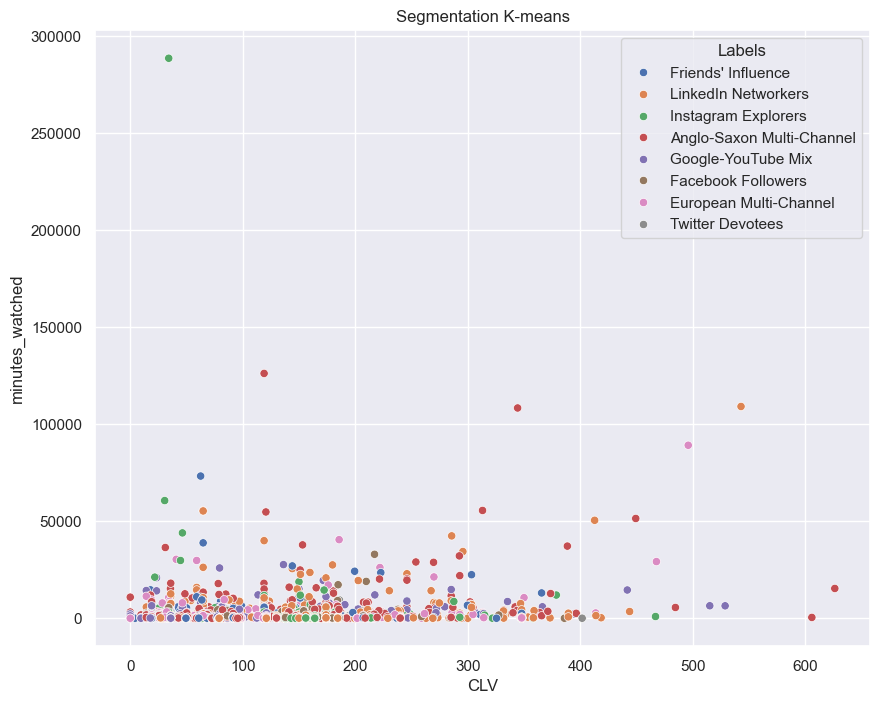

In [ ]:
# Defining the x-axis data as 'total_payments' from the dataframe.
x_axis = df_segm_kmeans['CLV']

# Defining the y-axis data as 'minutes_watched' from the dataframe
y_axis = df_segm_kmeans['minutes_watched']

# Setting the figure size for the scatter plot.
plt.figure(figsize = (10, 8))

# Creating a scatter plot using seaborn.
# The 'hue' parameter colors the points based on the 'Labels' column, allowing for distinction between clusters.
sns.scatterplot(x = x_axis, y = y_axis, hue = df_segm_kmeans['Labels'])

# Setting the title of the scatter plot.
plt.title('Segmentation K-means')

# Displaying the scatter plot.
plt.show()

The chart shows 8 customer segments based on CLV and minutes watched. Each segment has distinct characteristics:

* **Instagram Explorers**: Low CLV, high video consumption.
* **LinkedIn Networkers**: High CLV, moderate video consumption.
* **Anglo-Saxon Multi-Channel**: Diverse CLV and video consumption.
* **Friends' Influence**: Moderate CLV and video consumption.
* **Facebook Followers**: High CLV, moderate video consumption.
* **European Multi-Channel**: Diverse CLV and video consumption.
* **Twitter Devotees**: Low CLV, high video consumption.
* **Google-YouTube Mix**: Moderate CLV and video consumption.

Insights:

* Customer behavior isn't solely driven by CLV.


Now that we have our segments, we can proceed with the last but vital step: discuss results with the marketing team and help employ a viable marketing strategy.

Segments: First, we’ll focus on the smallest segment, Twitter Devotees, with only 58 observations. Based on the characteristics of the cluster, we conclude that our efforts on Twitter bear little fruit. Our suggestion would be to reduce spending there to a minimum. And invest little resources to upload content to the platform because the results are unsatisfactory—perhaps due to the turmoil of the platform in recent months. We suggest marketing become an early adopter of a new competitor platform, such as Threads.
Next, let’s examine those who frequent  Facebook. Although they’re not the most significant segment—close to 8% of all customers, with average spending in the lower half compared to the rest—the Facebook group is the most dedicated to learning. Their average watch time is over an impressive 2,700 minutes.
In terms of countries, it’s a mixed bag, with a little under a third from the US, Canada, or United Kingdom and over 60% from the rest of the world. It would be worth exploring how these students interact with the platform and why their group is more motivated to study. But this would be the focus of a different analysis on engagement.

Performance by region: Now, let’s turn to a critical aspect of marketing: performance by region. Overall, the Anglo-Saxon channel has the best performance. Customers from the USA, Canada, The UK, and Australia make up the largest customer segment from that region.  And the Google-YouTube Mix has the second largest segment, with over 900 customers from that region. The second largest area is the rest of the world.
The fewest customers are from Western Europe. Considering our initial hypothesis of exact spending for all three regions, we conclude that Western Europe’s marketing efforts are insufficient. At the same time, we observe that this segment has the highest CLV, so addressing this region and improving performance is crucial.

CLV: Let's also address the spending in various regions of the countries because this is crucial to marketing. The two highest-paying clusters are the Anglo-Saxon Multichannel and the European Multichannel. The European countries top the list of spending. When we look at the channels—through which these two segments come to the platform—we see a mix between Google, YouTube, and LinkedIn.

Based on that information, we advise marketing to focus on these acquisition channels for these regions and increase spending. This would be worthwhile because the CLV of these customers is the highest across our customer segments—meaning they are worth pursuing.

And what about the remaining regions and their channel of acquisition?

For the rest of the world, LinkedIn is the most successful channel in terms of conversion, followed by Facebook, which is why it should be the primary source for attracting customers from these regions. LinkedIn is a platform that provides excellent organic reach. Our content there is very popular; many students share their certificates and spread the word organically.